# Step 1

**1. Black Scholes Models for European Options**

For the next set of questions, assume the following values and parameters:

S
0 = 100; r = 5%; σ = 20%; T = 3 months

In [ ]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Initialize paramters
S0 = 100 # initial stock price
K = 100 # ATM strike price
r = 0.05 # risk free rate
sigma = 0.20 # volatility
T = 3/12 # time to maturity: 3months

d1 = (np.log(S0/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T)

#alculate European Call and Put Option Price
bs_call_price = S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
bs_put_price = K*np.exp(-r*T)*norm.cdf(-d2) - S0*norm.cdf(-d1)

print(f"European Call Price: ${bs_call_price:.2f}")
print(f"European Put Price: ${bs_put_price:.2f}")

European Call Price: $4.61
European Put Price: $3.37


In [ ]:
#Calculate Call and Put Delta
call_delta = norm.cdf(d1)
put_delta = norm.cdf(d1) - 1

print(f"European Call Delta: {call_delta:.4f}")
print(f"European Put Delta: {put_delta:.4f}")

European Call Delta: 0.5695
European Put Delta: -0.4305


In [ ]:
# Calculate Vega
def bs_price(S, K, r, T, sigma, option_type='call'):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    if option_type == 'call':
        return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    else:
        return K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)

vega = S0 * np.sqrt(T) * norm.pdf(d1)

print(f"Vega: {vega:.4f}")


Vega: 19.6440


In [ ]:
# Call and Put Price chnge (under the BS model)
# Prices with original volatility (20%)
bs_call_price_20 = bs_price(S0, K, r, T, 0.20, 'call')
bs_put_price_20 = bs_price(S0, K, r, T, 0.20, 'put')

# Prices with increased volatility (25%)
bs_call_price_25 = bs_price(S0, K, r, T, 0.25, 'call')
bs_put_price_25 = bs_price(S0, K, r, T, 0.25, 'put')
print(f"Call price change: ${bs_call_price_25 - bs_call_price_20:.2f}")
print(f"Put price change: ${bs_put_price_25 - bs_put_price_20:.2f}")

Call price change: $0.98
Put price change: $0.98


**2. Monte Carlo Model for European Options**

We will employ a Monte Carlo simulation using a Geometric Brownian Motion (GBM) process to value an European Call option and determine its delta and vega. Although there are several methods for pricing European options, we have chosen the Least Squares Monte Carlo (LSM) method, as it is one of the most competent approaches for this task.

In [ ]:
#Monte Carlo European Option Prices
def bs_call_mc(S, K, r, sigma, T, t, Ite, option_type):
    data = np.zeros((Ite, 2))
    z = np.random.normal(0, 1, [1, Ite])
    ST = S * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    if option_type=="call":
        data[:, 1] = ST - K
    else:
        data[:, 1] = K - ST

    average = np.sum(np.amax(data, axis=1)) / float(Ite)

    return np.exp(-r * (T - t)) * average

In [ ]:
np.random.seed(42)

In [ ]:
# Finding best number of iterations
price_array = []
for Ite in [ 500, 600, 700, 800, 900, 1000, 1500,2000, 2500, 3000, 4000, 5000, 6000, 70000, 8000, 9000, 10000]:
    mc_call_price =   bs_call_mc(100, 100, 0.05, 0.20, 3/12, 0, Ite, 'call')
    price_array.append(mc_call_price)
    print("With Ite = {:3d}, the price is {:.2f}".format(Ite, mc_call_price))

With Ite = 500, the price is 4.57
With Ite = 600, the price is 4.80
With Ite = 700, the price is 5.06
With Ite = 800, the price is 4.54
With Ite = 900, the price is 4.70
With Ite = 1000, the price is 4.33
With Ite = 1500, the price is 4.40
With Ite = 2000, the price is 4.75
With Ite = 2500, the price is 4.54
With Ite = 3000, the price is 4.55
With Ite = 4000, the price is 4.80
With Ite = 5000, the price is 4.60
With Ite = 6000, the price is 4.55
With Ite = 70000, the price is 4.63
With Ite = 8000, the price is 4.55
With Ite = 9000, the price is 4.72
With Ite = 10000, the price is 4.56


Although, there is no fixed suitable number of simulations/iterations that will result in convergence of Call price, we will work with Ite/num_simulations) = 10000, for remainder of the python code in this notebook.

In [ ]:
# Monte Carlo Call and Put Option Price
print(f"Monte Carlo European Call Price: {bs_call_mc(100, 100, 0.05, 0.20, 3/12, 0, 10000, 'call'):.2f}")
print(f"Monte Carlo European Put Price: {bs_call_mc(100, 100, 0.05, 0.20, 3/12, 0, 10000, 'put'):.2f}")

Monte Carlo European Call Price: 4.68
Monte Carlo European Put Price: 3.43


In [ ]:
mc_call_price = bs_call_mc(100, 100, 0.05, 0.20, 3/12, 0, 10000, 'call').round(2)
mc_put_price = bs_call_mc(100, 100, 0.05, 0.20, 3/12, 0, 10000, 'put').round(2)

In [ ]:
# Initialize
S0 = 100            # Initial stock price
K = 100             # Strike price
T = 3/12             # Time to maturity (1 year)
r = 0.05            # Risk-free interest rate
sigma = 0.2         # Volatility
num_simulations = 10000  # Number of simulations
num_steps = 63 # Number of time steps for 3 months


# Small changes for finite differences
delta_S = 0.01 * S0 # assume that intuition in GWP 1 tree, stock price move by factor 0.01
delta_sigma = 0.05 # change in volatility

# Time increment
dt = T / num_steps

In [ ]:
# Call Delta
option_type ='call'
def monte_carlo_option_delta(S0, K, T, r, sigma, num_simulations, num_steps, option_type):
    """Monte Carlo simulation for European call option price."""
    payoffs = []
    for _ in range(num_simulations):
        # Simulate the path
        S = S0
        for _ in range(num_steps):
            Z = np.random.standard_normal()
            S *= np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
        # Calculate payoff at maturity
        if option_type == 'call':
            payoff = max(S - K, 0)  # Call option payoff
        else:
            payoff = max(K - S, 0)
        payoffs.append(payoff)
    # Discounted average payoff
    return np.exp(-r * T) * np.mean(payoffs)

# Base option price
option_price = monte_carlo_option_delta(S0, K, T, r, sigma, num_simulations, num_steps, option_type)

# Calculate Delta
option_price_up = monte_carlo_option_delta(S0 + delta_S, K, T, r, sigma, num_simulations, num_steps, option_type)
delta = (option_price_up - option_price) / delta_S

# Calculate Vega
option_price_vol_up = monte_carlo_option_delta(S0, K, T, r, sigma + delta_sigma, num_simulations, num_steps, option_type)


print(f"European Call Delta: {delta:.4f}")


European Call Delta: 0.4714


In [ ]:
# Put Delta
option_type ='put'
def monte_carlo_option_delta(S0, K, T, r, sigma, num_simulations, num_steps, option_type):
    """Monte Carlo simulation for European call option price."""
    payoffs = []
    for _ in range(num_simulations):
        # Simulate the path
        S = S0
        for _ in range(num_steps):
            Z = np.random.standard_normal()
            S *= np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
        # Calculate payoff at maturity
        if option_type == 'call':
            payoff = max(S - K, 0)  # Call option payoff
        else:
            payoff = max(K - S, 0)
        payoffs.append(payoff)
    # Discounted average payoff
    return np.exp(-r * T) * np.mean(payoffs)

# Base option price
option_price = monte_carlo_option_delta(S0, K, T, r, sigma, num_simulations, num_steps, option_type)

# Calculate Delta
option_price_up = monte_carlo_option_delta(S0 + delta_S, K, T, r, sigma, num_simulations, num_steps, option_type)
delta = (option_price_up - option_price) / delta_S

# Calculate Vega
option_price_vol_up = monte_carlo_option_delta(S0, K, T, r, sigma + delta_sigma, num_simulations, num_steps, option_type)
vega = (option_price_vol_up - option_price) / delta_sigma

print(f"European Put Delta: {delta:.4f}")

European Put Delta: -0.3682


In [ ]:
# Vega
vega = (option_price_vol_up - option_price) / delta_sigma
print(f"Vega: {vega:.4f}")

Vega: 18.7443


In [ ]:
# Call and Put Price chnge (under the MC model)
# Prices with original volatility (20%)
mc_call_price_20 = bs_call_mc(100, 100, 0.05, 0.20, 3/12, 0, 10000, 'call')
mc_put_price_20 = bs_call_mc(100, 100, 0.05, 0.20, 3/12, 0, 10000, 'put')

# Prices with increased volatility (25%)
mc_call_price_25 = bs_call_mc(100, 100, 0.05, 0.25, 3/12, 0, 10000, 'call')
mc_put_price_25 = bs_call_mc(100, 100, 0.05, 0.25, 3/12, 0, 10000, 'put')
print(f"Call price change: ${mc_call_price_25 - mc_call_price_20:.2f}")
print(f"Put price change: ${mc_put_price_25 - mc_put_price_20:.2f}")

Call price change: $1.01
Put price change: $1.14


Vega affects the prices for call and put. However, in the case, the change in put price is slighty higher than the that of call price.

**3. Put-Call Parity (BS-MC Comparison)**

In [ ]:
#Put-Call Parity Difference for Black-Scholes Method
bs_parity_difference = bs_call_price - bs_put_price - (S0 - K * np.exp(-r * T))
print(f"Black-Scholes Put-Call Parity Difference: {bs_parity_difference:.4f}")

Black-Scholes Put-Call Parity Difference: -0.0000


In [ ]:
# Put_Parity for Monte Carlo Model
mc_parity_difference = mc_call_price - mc_put_price - (S0 - K * np.exp(-r * T))
print(f"Monte Carlo Put-Call Parity Difference: {mc_parity_difference:.4f}")

Monte Carlo Put-Call Parity Difference: 0.0178


a. Put-Call Parity is satisfied under both the Black-Scholes Model and the Monte Carlo Simulation. The parity difference for the former is 0. while for the latter is significantly low (almost zero). The averaging of option prices across a large number of simulations tend give varying values but significantly low deviation for the value obtained in the Black-Scholes model.

b. The prices obtained for Monte Carlo Method are pretty much close to that of the Black Scholes Model. However, both models do no converge for the following reasons:

- the BS model assumes continuous trading and perfect hedging, leading to a precise analytical solution. In contrast, MC simulations often approximate this by modeling the stock price at discrete time intervals (e.g., daily steps), which introduces small errors since continuous paths are only approximated.
- The large number of random paths used to estimated the option payoff obtained as result of large number of simulations produce approximate standard sampling errors in the Monte Carlo model which does not match the error in the analytical Black Scholes option pricing.

# Step 2

**Parameters**

- $S0 = 100$       (stock price)







- $r = 0.05$       (Risk-free rate)
- $sigma = 0.20$   (Volatility)
- $T = 3 / 12$      (Time to expiration in years (3 months))
- $N = 63$  (Number of steps for time steps for 3 months)

**4. Monte Carlo Model for American Call Option**

In [ ]:
# Parameters
S0 = 100         # initial stock price
K = 100          # strike price
T = 3/12           # time to maturity in years
r = 0.05         # risk-free interest rate
sigma = 0.2      # volatility of the underlying stock
n_simulations = 100000  # number of Monte Carlo simulations
n_steps = 63          # number of time steps for 3months
bump_size = 0.01       # bump size for finite difference in stock prices (from GWP1: factor is 0.01)
delta_sigma = 0.05 # 5% change in volatility


In [ ]:

def american_option_price(S0, sigma, option_type):
    dt = T / n_steps
    S = np.zeros((n_simulations, n_steps + 1))
    S[:, 0] = S0
    for t in range(1, n_steps + 1):
        Z = np.random.standard_normal(n_simulations)
        S[:, t] = S[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

    # Set the payoff depending on option type
    if option_type == "call":
        payoff = lambda x: np.maximum(x - K, 0)
    elif option_type == "put":
        payoff = lambda x: np.maximum(K - x, 0)

    cash_flows = payoff(S[:, -1])

    # LSMC backward induction
    for t in range(n_steps - 1, 0, -1):
        in_the_money = payoff(S[:, t]) > 0
        S_in_the_money = S[in_the_money, t]
        cash_flows_in_the_money = cash_flows[in_the_money] * np.exp(-r * dt)

        if len(S_in_the_money) > 0:
            X = np.vstack([np.ones(S_in_the_money.shape), S_in_the_money, S_in_the_money ** 2]).T
            coeff = np.linalg.lstsq(X, cash_flows_in_the_money, rcond=None)[0]
            continuation_values = X @ coeff

            exercise = payoff(S_in_the_money) > continuation_values
            cash_flows[in_the_money] = np.where(exercise, payoff(S_in_the_money), cash_flows_in_the_money)

    return np.mean(cash_flows) * np.exp(-r * dt)




In [ ]:
# Calculate the original American Call option price
price_original_call = american_option_price(S0, sigma, option_type="call")

price_bumped_call = american_option_price(S0 * (1 + bump_size), sigma, option_type="call") #measure change in call option price which change ins stock volatiltilty change

#Calculate Call Delta
delta_call = (price_bumped_call - price_original_call) / (S0 * bump_size)

#Calculate Vega
price_bumped_vega_call = american_option_price(S0, sigma + delta_sigma, option_type="call")
vega_call = (price_bumped_vega_call - price_original_call) / delta_sigma

# Print results
print(f"American Call Option Price: {price_original_call:.2f}")
print(f"Delta of American Call Option: {delta_call:.4f}")
print(f"Vega of American Call Option: {vega_call:.4f}\n")
print(f"Change in American Call Price: {price_bumped_vega_call - price_original_call:.4f}\n")

American Call Option Price: 4.55
Delta of American Call Option: 0.6021
Vega of American Call Option: 19.8000

Change in American Call Price: 0.9900



**5. Monte Carlo Model for American Put Option**

In [ ]:
# Calculate the original American Put option price
price_original_put = american_option_price(S0, sigma, option_type="put")

price_bumped_put = american_option_price(S0 * (1 + bump_size), sigma, option_type="put") #measure change in put option price which change ins stock volatiltilty change

#Calculate Put Delta
delta_put = (price_bumped_put - price_original_put) / (S0 * bump_size)

#Calculate Vega
price_bumped_vega_put = american_option_price(S0, sigma + delta_sigma, option_type="put")
vega_put = (price_bumped_vega_put - price_original_put) / delta_sigma

# Print results
print(f"American Put Option Price: {price_original_put:.2f}")
print(f"Delta of American Put Option: {delta_put:.4f}")
print(f"Vega of American Put Option: {vega_put:.4f}\n")
print(f"Change in American Put Price: {price_bumped_vega_put - price_original_put:.4f}\n")

American Put Option Price: 3.49
Delta of American Put Option: -0.4322
Vega of American Put Option: 19.6187

Change in American Put Price: 0.9809



The price change for the American Call Price and Put price with respect to change in volatiltiy is very similar (approximately) the same.

**6. Options Price-Moneyness Comparison**

For Call Option:
- For Deep ITM: we will consider moneyness (K/S0_) of **90%**. (i.e **K = 90**)

- For ITM : we will consider moneyness (K/S0) of **95%** (i.e **K = 95**)

- ATM: K = S0 = **100**

- For OTM: we will consider moneyness (K/S0) of **105%**. (i.e **K = 105**)

- For Deep OTM: we will consider moneyness (K/S0) of **110%** (i.e **K = 110**)

For Put Option:
- For Deep OTM: we will consider moneyness (K/S0_) of **90%**. (i.e **K = 90**)

- For OTM : we will consider moneyness (K/S0) of **95%** (i.e **K = 95**)

- ATM: K = S0 = **100**

- For ITM: we will consider moneyness (K/S0) of **105%**. (i.e **K = 105**)

- For Deep ITM: we will consider moneyness (K/S0) of **110%** (i.e **K = 110**)


In [ ]:
# American Call for difference Strike Prices
american_call_array = []
for K in [90, 95, 100, 105, 110]:
    american_call_price = american_option_price(S0, sigma, option_type="call")
    american_call_array.append(american_call_price)
    print("With K = {:3d}, the price is {:.2f}".format(K, american_call_price))

With K =  90, the price is 11.67
With K =  95, the price is 7.59
With K = 100, the price is 4.53
With K = 105, the price is 2.43
With K = 110, the price is 1.19


In [ ]:
# American Put for difference Strike Prices
american_put_array = []
for K in [90, 95, 100, 105, 110]:
    american_put_price = american_option_price(S0, sigma, option_type="put")
    american_put_array.append(american_put_price)
    print("With K = {:3d}, the price is {:.2f}".format(K, american_put_price))

With K =  90, the price is 0.56
With K =  95, the price is 1.57
With K = 100, the price is 3.47
With K = 105, the price is 6.39
With K = 110, the price is 10.30


In [ ]:
# compile list of arrays
strike_prices = np.array([90, 95, 100, 105, 110]) # for Deep ITM, ITM, ATM, OTM & Deep OTM respectively
stock_prices = np.array([100, 100, 100, 100, 100])
moneyness = strike_prices/stock_prices
american_raw_data = pd.DataFrame([american_call_array, american_put_array, stock_prices, strike_prices, moneyness])
american_data = american_raw_data.transpose()
american_data.columns = ["American_call_price", "American_put_price", "Stock_price", "Strike_price","Moneyness" ]
american_data.round(2)

,American_call_price,American_put_price,Stock_price,Strike_price,Moneyness
0,11.67,0.56,100.0,90.0,0.90
1,7.59,1.57,100.0,95.0,0.95
2,4.53,3.47,100.0,100.0,1.00
3,2.43,6.39,100.0,105.0,1.05
4,1.19,10.30,100.0,110.0,1.10


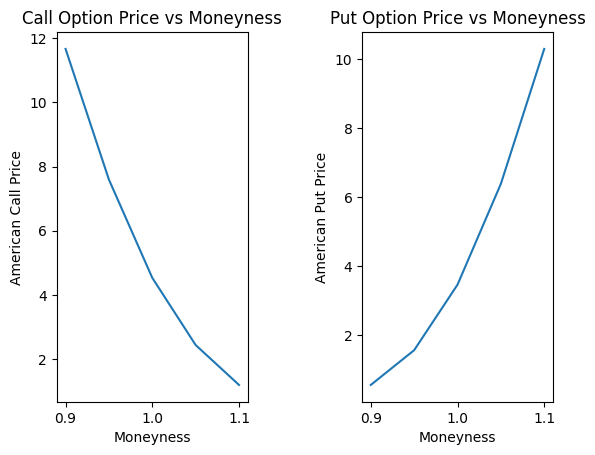

In [ ]:
fig, ax = plt.subplots(1,2)
fig.subplots_adjust(wspace=0.6)

ax[0].plot(american_data['Moneyness'], american_data['American_call_price'] )
ax[0].set_title("Call Option Price vs Moneyness")
ax[0].set_xlabel("Moneyness")
ax[0].set_ylabel("American Call Price")


ax[1].plot(american_data['Moneyness'], american_data['American_put_price'] )
ax[1].set_title("Put Option Price vs Moneyness")
ax[1].set_xlabel("Moneyness")
ax[1].set_ylabel("American Put Price")


plt.show()

# Step 3

**7. Black-Scholes European Exotic Options**

The Black-Scholes model will serve as our tool for pricing European options that are at varying levels of moneyness. We will then examine the delta of constructed portfolios that utilize these options.

In [ ]:
# Parameters
S0 = 100  # Initial stock price
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
T = 0.25  # Time to maturity (3 months)

def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:  # put
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    return price

def black_scholes_delta(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

    if option_type == 'call':
        delta = norm.cdf(d1)
    else:  # put
        delta = norm.cdf(d1) - 1

    return delta

# Calculate strike prices
K_call = S0 * 1.10  # 110% moneyness
K_put = S0 * 0.95   # 95% moneyness

# Price the options
call_price = black_scholes(S0, K_call, T, r, sigma, 'call')
put_price = black_scholes(S0, K_put, T, r, sigma, 'put')

print(f"a. European Call option price (110% moneyness): ${call_price:.2f}")
print(f"   European Put option price (95% moneyness): ${put_price:.2f}")

# Calculate deltas
call_delta = black_scholes_delta(S0, K_call, T, r, sigma, 'call')
put_delta = black_scholes_delta(S0, K_put, T, r, sigma, 'put')

# Portfolio 1: Long Call and Long Put
portfolio1_delta = call_delta + put_delta

print(f"\nb. Portfolio 1 (Long Call + Long Put) delta: {portfolio1_delta:.4f}")
print(f"   To delta-hedge: Sell {portfolio1_delta:.4f} shares of the underlying stock")

# Portfolio 2: Long Call and Short Put
portfolio2_delta = call_delta - put_delta

print(f"\nc. Portfolio 2 (Long Call + Short Put) delta: {portfolio2_delta:.4f}")
print(f"   To delta-hedge: Sell {portfolio2_delta:.4f} shares of the underlying stock")

a. European Call option price (110% moneyness): $1.19
   European Put option price (95% moneyness): $1.53

b. Portfolio 1 (Long Call + Long Put) delta: -0.0275
   To delta-hedge: Sell -0.0275 shares of the underlying stock

c. Portfolio 2 (Long Call + Short Put) delta: 0.4640
   To delta-hedge: Sell 0.4640 shares of the underlying stock


**8. Up-and-Out Barrier Option**

**Parameters**

- $S = 120$       (stock price)

- $K = 120$  (ATM strike price)
- $B = 141$ (Barrier level)

- $r = 0.06$       (Risk-free rate)
- $sigma = 0.30$   (Volatility)
- $T = 8 / 12$      (Time to expiration in years (8 months))
- $N = 168$  (Number of time steps for 8months)

In [ ]:
# Parameters
S0 = 120             # Initial stock price
K = 120              # Strike price (ATM, so equal to S0)
B = 141              # Barrier level
T = 8/12              # Time to maturity (8 months)
r = 0.06             # Risk-free interest rate (6%)
sigma = 0.2          # Volatility of the underlying (20%)
num_simulations = 10000  # Number of Monte Carlo simulations
num_steps = 168          # Number of steps per simulation (daily steps for 8 months)

# Time increment per step
dt = T / num_steps
# Simulate the paths
np.random.seed(0)  # For reproducibility




In [ ]:
# ATM Up-and-Out Barrier Call Option
payoffs = []
for i in range(num_simulations):
    # Generate an array of random standard normal values for each step
    Z = np.random.standard_normal(num_steps)

    # Create the price path
    S = np.zeros(num_steps + 1)
    S[0] = S0
    knocked_out = True

    # Generate the price path
    for t in range(1, num_steps + 1):
        S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[t-1])

        # Check if the barrier is breached
        if S[t] >= B:
            knocked_out = True
            break

    # Calculate the payoff if the option has not knocked out
    if not knocked_out:
        payoff = max(S[-1] - K, 0)  # Payoff for a call option
        payoffs.append(payoff)

# Calculate the option price
option_price = np.exp(-r * T) * np.mean(payoffs) if payoffs else 0

print(f"The estimated price of the ATM up-and-out call barrier option is: {option_price:.2f}")

The estimated price of the ATM up-and-out call barrier option is: 0.00


In [ ]:
# ATM Up-and-Out Barrier Put Option
payoffs = []
for i in range(num_simulations):
    # Generate an array of random standard normal values for each step
    Z = np.random.standard_normal(num_steps)

    # Create the price path
    S = np.zeros(num_steps + 1)
    S[0] = S0
    knocked_out = False

    # Generate the price path
    for t in range(1, num_steps + 1):
        S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[t-1])

        # Check if the barrier is breached
        if S[t] >= B:
            knocked_out = True
            break

    # Calculate the payoff if the option has not knocked out
    if not knocked_out:
        payoff = max(K - S[-1], 0)  # Payoff for a put option
        payoffs.append(payoff)

# Calculate the option price
option_price = np.exp(-r * T) * np.mean(payoffs) if payoffs else 0

print(f"The estimated price of the ATM up-and-out Put barrier option is: {option_price:.2f}")

The estimated price of the ATM up-and-out Put barrier option is: 8.60


**9a. Up-and-In Barrier Option**

**Parameters**

- $S = 120$       (stock price)

- $K = 120$  (ATM strike price)
- $B = 141$ (Barrier level)


- $r = 0.06$       (Risk-free rate)
- $sigma = 0.30$   (Volatility)
- $T = 8 / 12$      (Time to expiration in years (8 months))
- $N = 168$  (Number of time steps for 8months)

In [ ]:
# Parameters
S0 = 120             # Initial stock price
K = 120              # Strike price (ATM, so equal to S0)
B = 141              # Barrier level (up-and-in)
T = 8/12             # Time to maturity (8 months)
r = 0.06             # Risk-free interest rate (5%)
sigma = 0.3         # Volatility of the underlying (20%)
num_simulations = 10000  # Number of Monte Carlo simulations
num_steps = 168         # Number of steps per simulation (daily steps for 8 months)

# Time increment per step
dt = T / num_steps

# Simulate the paths
np.random.seed(0)  # For reproducibility


In [ ]:
# ATM Up-and-In Barrier Call Option

# Simulate the paths
np.random.seed(0)  # For reproducibility
payoffs = []

for i in range(num_simulations):
    # Generate an array of random standard normal values for each step
    Z = np.random.standard_normal(num_steps)

    # Create the price path
    S = np.zeros(num_steps + 1)
    S[0] = S0
    barrier_reached = True

    # Generate the price path
    for t in range(1, num_steps + 1):
        S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[t-1])

        # Check if the barrier is reached
        if S[t] >= B:
            barrier_reached = True

    # Calculate the payoff if the barrier was reached
    if barrier_reached:
        payoff = max(S[-1] - K, 0)  # Payoff for a call option
        payoffs.append(payoff)

# Calculate the option price
option_price = np.exp(-r * T) * np.mean(payoffs) if payoffs else 0

print(f"The estimated price of the ATM up-and-in call barrier option is: {option_price:.2f}")

The estimated price of the ATM up-and-in call barrier option is: 13.86


In [ ]:
# ATM Up-and-In Barrier Put Option
payoffs = []

for i in range(num_simulations):
    # Generate an array of random standard normal values for each step
    Z = np.random.standard_normal(num_steps)

    # Create the price path
    S = np.zeros(num_steps + 1)
    S[0] = S0
    barrier_reached = False

    # Generate the price path
    for t in range(1, num_steps + 1):
        S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[t-1])

        # Check if the barrier is reached
        if S[t] >= B:
            barrier_reached = True

    # Calculate the payoff if the barrier was reached
    if barrier_reached:
        payoff = max(K - S[-1], 0)  # Payoff for a put option
        payoffs.append(payoff)

# Calculate the option price
option_price = np.exp(-r * T) * np.mean(payoffs) if payoffs else 0

print(f"The estimated price of the ATM up-and-in put barrier option is: {option_price:.2f}")

The estimated price of the ATM up-and-in put barrier option is: 1.88


**9b. Vanilla Option**

In [ ]:
#Monte Carlo Vanila Option Prices

def vanilla_option(S0, K, r, sigma, T, t, num_simulations, option_type):
    data = np.zeros((num_simulations, 2))
    z = np.random.normal(0, 1, [1,  num_simulations])
    S = S0 * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    if option_type=="call":
        data[:, 1] = S - K
    else:
        data[:, 1] = K - S

    average = np.sum(np.amax(data, axis=1)) / float(num_simulations)

    return np.exp(-r * (T - t)) * average

In [ ]:
print(f"Vanilla Call Price:, {vanilla_option(120, 120, 0.06, 0.30, 8/12, 0, 10000, 'call'):.2f}")
print(f"Vanilla Put Price:, {vanilla_option(120, 120, 0.06, 0.30, 8/12, 0, 10000, 'put'):.2f}")

Vanilla Call Price:, 13.94
Vanilla Put Price:, 9.24


**9c. Relationship Between UAO, UAI and Vanilla Options**

- Up-and-Out Barrier Option: A call or put option that ceases to exist (or "knocks out") if the underlying asset's price rises above a certain barrier level during the life of the option.

- Up-and-In Barrier Option: A call or put option that only comes into existence (or "knocks in") if the underlying asset's price rises above a certain barrier level during the option's life.

- Vanilla Option: A standard European call or put option with no barrier or path-dependency

From the results options above, it is obaserved that the result for the Vanilla Call option price(13.94) is the approximate sume of the Up-and-Out Barrier Call  Option price (0.00) and Up-and-In barrier Call option price (13.86). In the same vein, the Vanila Put option price (9.24) is the approximate sum of the Up-and-Out Barrier put option price (8.60) and the Up-and-In barrier put option price (1.88).

The proves the theory that:

Vanilla Option Price = Up-and Out Barrier Option Price + Up-and-In Barrier Option Price.

**V = UAO + UAI.**

